# PCA (Principal Component Analysis)
PCA is used to reduce the no. of variables in a dataset which simplifies the data and hence, improves our model performance. 
It identifies a set of orthogonal axes called principal components that capture the maximum variance in the data. 

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame= True).frame   # load dataset 

In [2]:
cancer.head() # display top 5 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
cancer.shape

(569, 31)

In [4]:
cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
X = cancer.iloc[:,0:-1]

In [6]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [8]:
X.shape  # shape of input features

(569, 30)

Now we will apply the first step which is to standardize the data and for that, we will have to first calculate the mean and standard deviation of each feature in the feature space.

In [9]:
# Mean
X_mean = X.mean()

In [10]:
X_mean

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [11]:
# Standard deviation
X_std = X.std()

In [12]:
X_std

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

In [13]:
# Standardization
Z = (X - X_mean) / X_std

In [14]:
Z

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [15]:
Z.mean()

mean radius               -3.142575e-15
mean texture              -6.558316e-15
mean perimeter            -7.012551e-16
mean area                 -8.339355e-16
mean smoothness            6.083788e-15
mean compactness          -1.081346e-15
mean concavity            -3.703345e-16
mean concave points        9.935423e-16
mean symmetry             -1.888550e-15
mean fractal dimension    -1.424363e-15
radius error              -9.780304e-16
texture error             -9.493480e-16
perimeter error            1.917135e-15
area error                -7.423275e-16
smoothness error          -7.441202e-16
compactness error         -3.929682e-16
concavity error            9.084707e-16
concave points error      -2.790191e-16
symmetry error            -2.796045e-16
fractal dimension error   -3.251646e-16
worst radius              -2.346102e-15
worst texture              1.761138e-15
worst perimeter           -1.214416e-15
worst area                 5.919889e-16
worst smoothness          -5.036783e-15


In [16]:
Z.std()

mean radius                1.0
mean texture               1.0
mean perimeter             1.0
mean area                  1.0
mean smoothness            1.0
mean compactness           1.0
mean concavity             1.0
mean concave points        1.0
mean symmetry              1.0
mean fractal dimension     1.0
radius error               1.0
texture error              1.0
perimeter error            1.0
area error                 1.0
smoothness error           1.0
compactness error          1.0
concavity error            1.0
concave points error       1.0
symmetry error             1.0
fractal dimension error    1.0
worst radius               1.0
worst texture              1.0
worst perimeter            1.0
worst area                 1.0
worst smoothness           1.0
worst compactness          1.0
worst concavity            1.0
worst concave points       1.0
worst symmetry             1.0
worst fractal dimension    1.0
dtype: float64

The covariance matrix helps us visualize how strong the dependency of two features is with each other in the feature space.

In [17]:
# covariance
c = Z.cov()   # c=Z.corr() both means the same

In [18]:
c

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


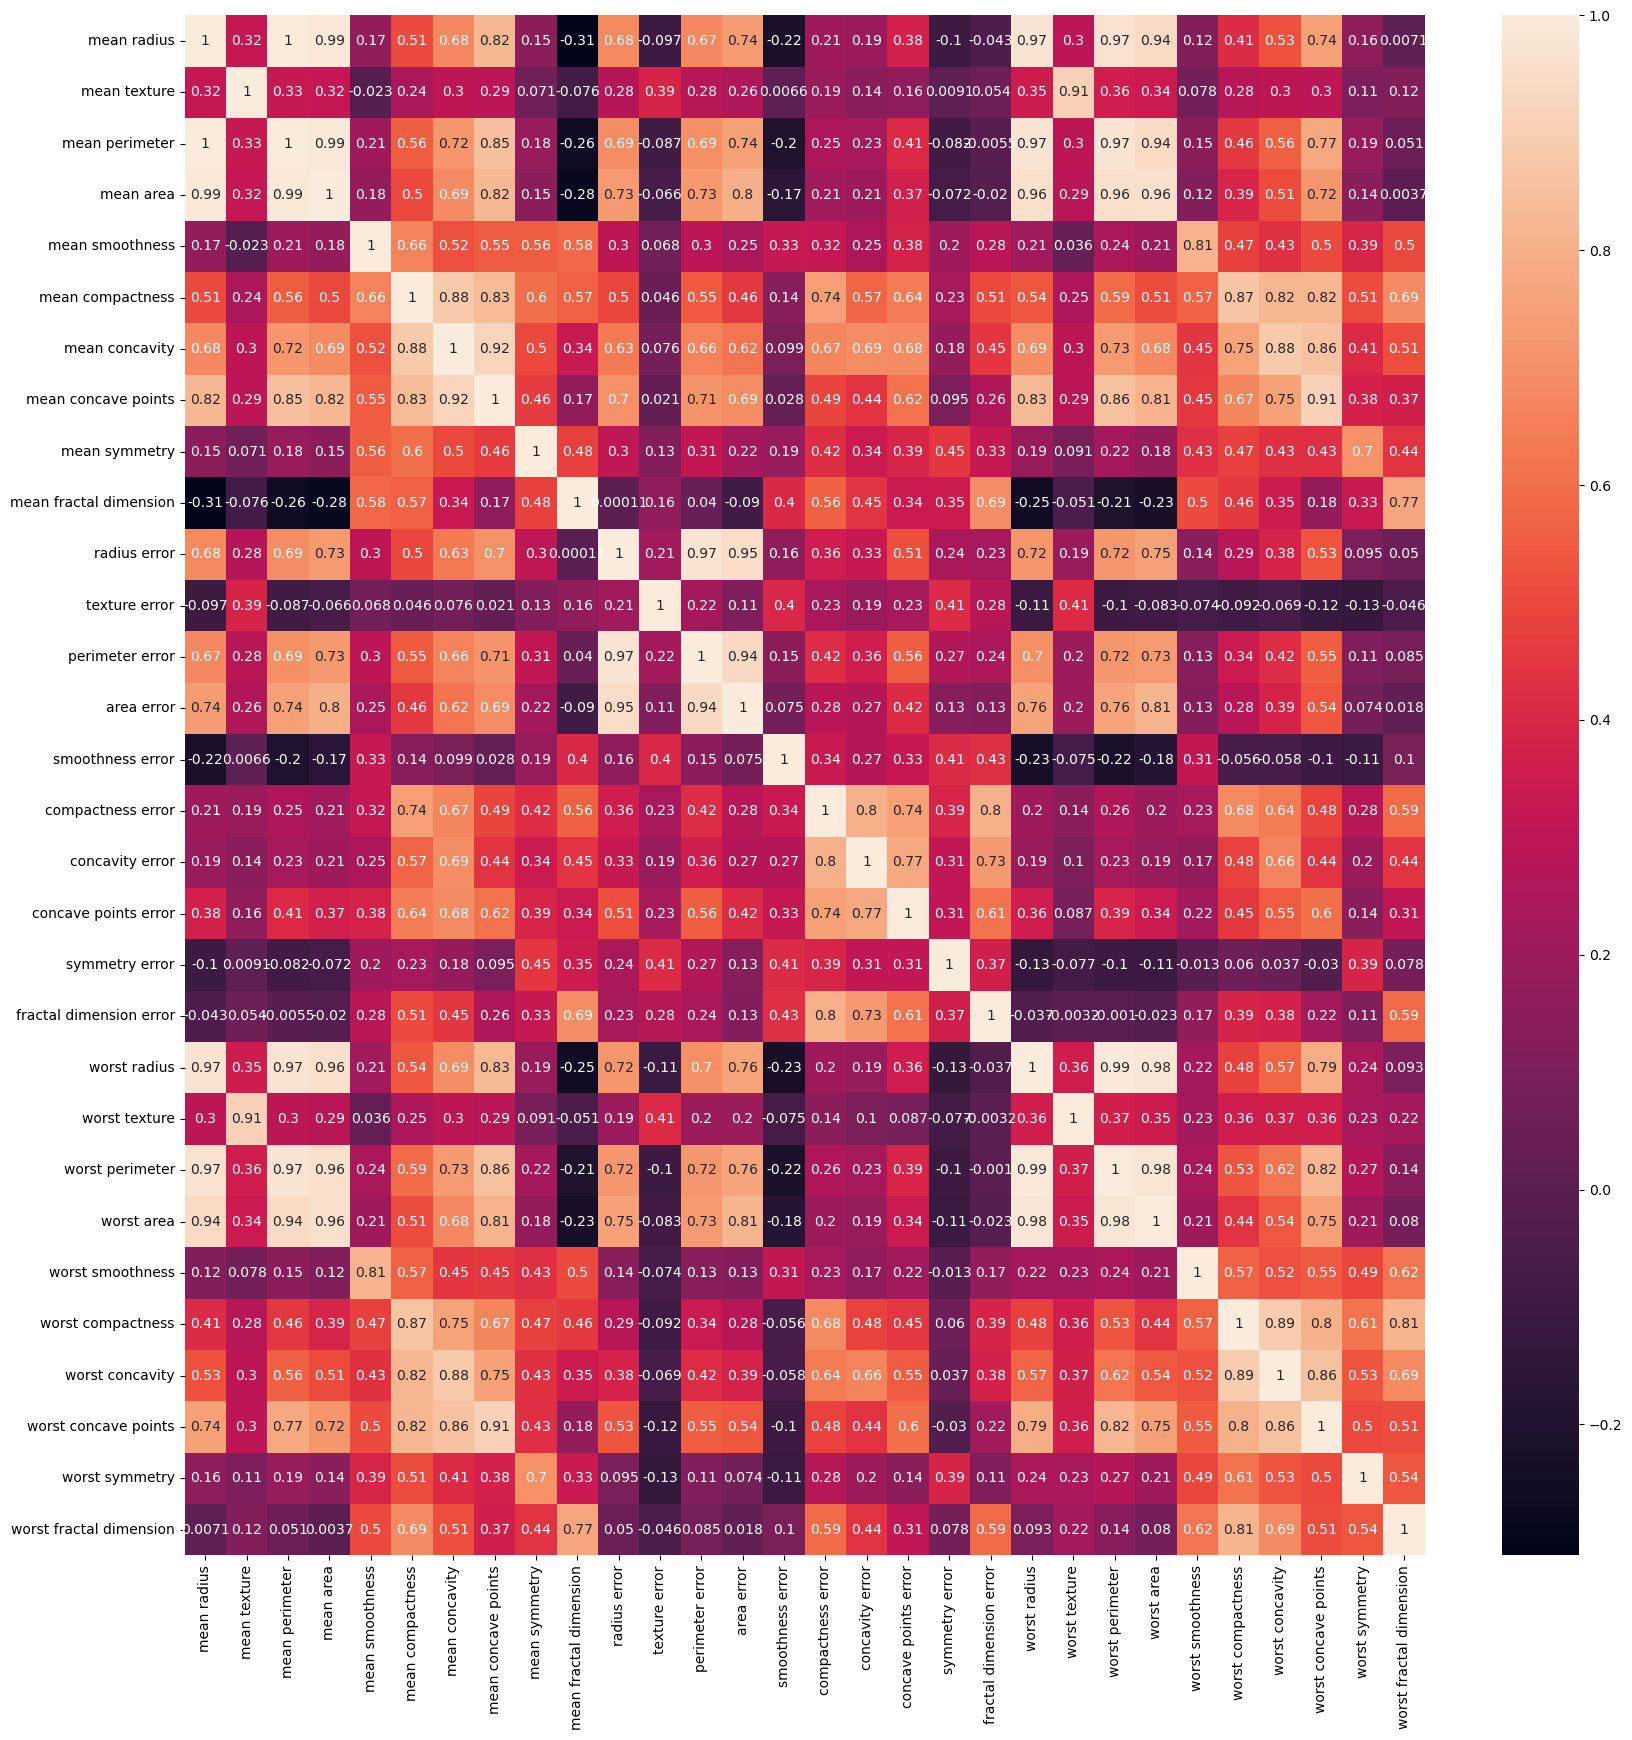

In [19]:
# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(c, annot = True)
plt.show()

Now we will compute the eigenvectors and eigenvalues for our feature space which serve a great purpose in identifying the principal components for our feature space.

In [20]:
import numpy as np

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(c)  # Linear algebra (numpy.linalg)

In [22]:
eigenvalues  

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 1.33044823e-04,
       7.48803097e-04, 1.58933787e-03, 6.90046388e-03, 8.17763986e-03,
       1.54812714e-02, 1.80550070e-02, 2.43408378e-02, 2.74394025e-02,
       3.11594025e-02, 2.99728939e-02])

In [23]:
eigenvectors 

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [24]:
eigenvalues.shape  # 1D

(30,)

In [25]:
eigenvectors.shape   #2D

(30, 30)

Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.

In [26]:
#argsort(), returns the indices which would sort an array.
eigenvalues.argsort() # return Index position to the eigenvalues ( 30 eigen values, so, 30 index values from 0 to 29)

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 28, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

Here, eigen values are not arranged in a sequence. So, let's arrange them in sequence and for that, first reverse the order of their index positions

In [27]:
# reverse the order of their index positions 
idx = eigenvalues.argsort()[::-1] 

In [28]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 28, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19], dtype=int64)

In [29]:
# Sort the eigenvalues based on above index positions 
eigenvalues = eigenvalues[idx]

In [30]:
eigenvalues

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

In [31]:
eigenvalues.argsort() # check their index positions 

array([29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0], dtype=int64)

It means, now eigen values are arranged sequentially (in descending order)

In [32]:
# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [33]:
eigenvectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -4.96986642e-02,  6.85700057e-02,
        -7.29289034e-02,  9.85526942e-02, -1.82579441e-01,
         1.92264989e-02,  1.29476396e-01, -1.31526670e-01,
        -2.11194013e-01,  2.11460455e-01, -7.02414091e-01],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.44134993e-01, -4.48369467e-

In [34]:
np.cumsum(eigenvalues) # cumulative sum of eigen values (display the sum of eigen values as they grow with time)

array([13.28160768, 18.9729623 , 21.79091127, 23.77155175, 25.4202823 ,
       26.62763891, 27.30285902, 27.77947616, 28.19637097, 28.54706443,
       28.84098013, 29.1021415 , 29.34349899, 29.50050872, 29.59464368,
       29.67450648, 29.73390552, 29.7865243 , 29.8360019 , 29.8671613 ,
       29.89713419, 29.92457359, 29.94891443, 29.96696944, 29.98245071,
       29.99062835, 29.99752881, 29.99911815, 29.99986696, 30.        ])

In [35]:
np.sum(eigenvalues) # total sum of eigen values 

30.00000000000002

Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.

In [36]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)

In [37]:
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [38]:
explained_var.argsort() # it means score is arranged sequentially (in ascending order)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

Determine the Number of Principal Components 

Here we can either consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance score more than equal to 50%. Let’s check how many principal components come into this.

In [39]:
explained_var >= 0.50

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

argmax() function in NumPy is a part of the numpy module and is used to find the indices of the maximum values along a specified axis in an array. It takes an array as input and returns an array of indices corresponding to the maximum values along the specified axis

In [40]:
np.argmax(explained_var >= 0.50) 

1

In [41]:
#explained_var >= 0.70 

In [42]:
#argmax is a function which gives the index of the greatest number in the given row or column 
#boolean: argmax() returns the index position of 1st True 

n_components = np.argmax(explained_var >= 0.50) + 1  
n_components #Number of Principal Components 

2

# Project the Data onto the Selected Principal Components

In [43]:
u = eigenvectors[:,:n_components]  #[:,:2]

In [44]:
u #projection matrix(unit matrix) denotes eigen vectors of largest eigen values depending on the no. of principal components

array([[ 0.21890244, -0.23385713],
       [ 0.10372458, -0.05970609],
       [ 0.22753729, -0.21518136],
       [ 0.22099499, -0.23107671],
       [ 0.14258969,  0.18611302],
       [ 0.23928535,  0.15189161],
       [ 0.25840048,  0.06016536],
       [ 0.26085376, -0.0347675 ],
       [ 0.13816696,  0.19034877],
       [ 0.06436335,  0.36657547],
       [ 0.20597878, -0.10555215],
       [ 0.01742803,  0.08997968],
       [ 0.21132592, -0.08945723],
       [ 0.20286964, -0.15229263],
       [ 0.01453145,  0.20443045],
       [ 0.17039345,  0.2327159 ],
       [ 0.15358979,  0.19720728],
       [ 0.1834174 ,  0.13032156],
       [ 0.04249842,  0.183848  ],
       [ 0.10256832,  0.28009203],
       [ 0.22799663, -0.21986638],
       [ 0.10446933, -0.0454673 ],
       [ 0.23663968, -0.19987843],
       [ 0.22487053, -0.21935186],
       [ 0.12795256,  0.17230435],
       [ 0.21009588,  0.14359317],
       [ 0.22876753,  0.09796411],
       [ 0.25088597, -0.00825724],
       [ 0.12290456,

Let's us represent projection matrix in a dataframe

In [45]:
import pandas as pd

In [46]:
cancer = load_breast_cancer(as_frame=True)

In [47]:
cancer

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [48]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [49]:
# pass 3 parameters to DataFrame func
# pass an array to index parameter. Therefore, don't pass X. columns to index parameter bec. it's not an array type
# make cancer['feature_names'] as index column
# make ['PC1','PC2'] as header
# u as value 

pd.DataFrame(u, index= cancer['feature_names'], columns= ['PC1','PC2']) 

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


In [50]:
projection_df = pd.DataFrame(u, index = cancer['feature_names'],columns = ['PC1','PC2']) # PC1, PC2 are the columns having eigen vectors 

In [51]:
projection_df # projection matrix in a dataframe

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


In [52]:
projection_df.shape

(30, 2)

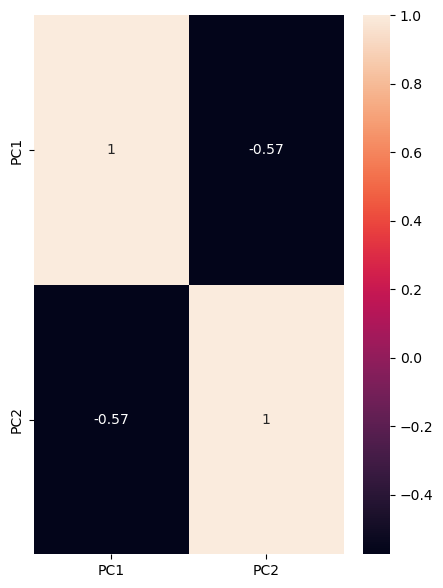

In [53]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(projection_df.corr(), annot=True)
plt.show()

In [54]:
# Matrix multiplication or dot Product
Z_pca = Z @ projection_df

In [55]:
Z_pca  # principal components

,PC1,PC2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540


In [56]:
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)

In [57]:
Z_pca  #principal components

,PCA1,PCA2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540


# OR

In [58]:
#PCA using Using Sklearn

# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=2)


In [59]:
pca

PCA(n_components=2)

In [60]:
pca.fit(Z)

PCA(n_components=2)

In [61]:
x_pca = pca.transform(Z)

In [62]:
x_pca  # principal components

array([[ 9.18475521,  1.94687003],
       [ 2.38570263, -3.76485906],
       [ 5.72885549, -1.07422859],
       ...,
       [ 1.25507494, -1.90062436],
       [10.36567336,  1.67054021],
       [-5.4704299 , -0.67004722]])

In [63]:
x_pca[:, 0]  # 1st principal component

array([ 9.18475521,  2.38570263,  5.72885549,  7.11669126,  3.93184247,
        2.37815462,  2.23691506,  2.14141428,  3.17213315,  6.34616284,
       -0.80970132,  2.64876984,  8.17783882,  0.34182514,  4.33856172,
        4.07207318,  0.22985277,  4.41412695,  4.94435304, -1.23597583,
       -1.57677384, -3.55420904,  4.72904972,  4.20482441,  4.94528075,
        7.09232236,  3.50717666,  3.06136021,  4.00374127,  1.71380176,
        6.05411853,  2.89968469,  4.55077848,  4.98621538,  2.98271631,
        2.76393718,  1.29505925, -3.7460173 , -0.99719148,  0.76459136,
       -2.14906252, -0.09324934,  9.08001023,  0.98958304, -0.29328849,
        5.37620991, -4.5779086 ,  1.69851237, -2.13456708, -1.56610099,
       -3.53979091, -3.15503795, -3.44745515,  3.29964761, -0.67402621,
       -2.85564577,  4.64465207,  2.17494916, -3.71818738, -4.13232693,
       -2.38373822, -2.5766161 ,  4.75492832, -2.31209785,  1.6901208 ,
        1.81071217, -2.78347559, -3.51555502,  4.32619605, -3.25

In [64]:
x_pca[:, 1] #2nd principal component

array([ 1.94687003e+00, -3.76485906e+00, -1.07422859e+00,  1.02665556e+01,
       -1.94635898e+00,  3.94645643e+00, -2.68766641e+00,  2.33818665e+00,
        3.38883114e+00,  7.72038095e+00, -2.65693767e+00,  6.65094053e-02,
        2.69860201e+00, -9.67428026e-01,  4.85680983e+00,  2.97444398e+00,
       -1.56338211e+00,  1.41742315e+00, -4.11071653e+00, -1.88049490e-01,
        5.72304625e-01,  1.66148797e+00,  3.30205827e+00, -5.12385806e+00,
       -1.54239514e+00,  2.01683573e+00,  2.16971599e+00, -1.87490263e+00,
        5.36769860e-01, -1.52236550e+00, -7.56511800e-01,  4.00177437e+00,
        3.37239419e-01, -1.13159322e+00,  7.57756497e-01, -3.54044421e-01,
        9.12393466e-01, -1.41223050e+00, -3.34834673e+00,  8.85464837e-01,
       -1.92230019e+00,  2.25876453e+00,  2.01689844e+00,  9.84064148e-01,
       -1.36978564e-01, -1.34758404e-01,  1.48291551e+00,  2.35020386e+00,
        9.57453637e-02, -1.20737085e+00, -1.28136811e+00, -1.68747380e+00,
       -4.97780720e-01, -

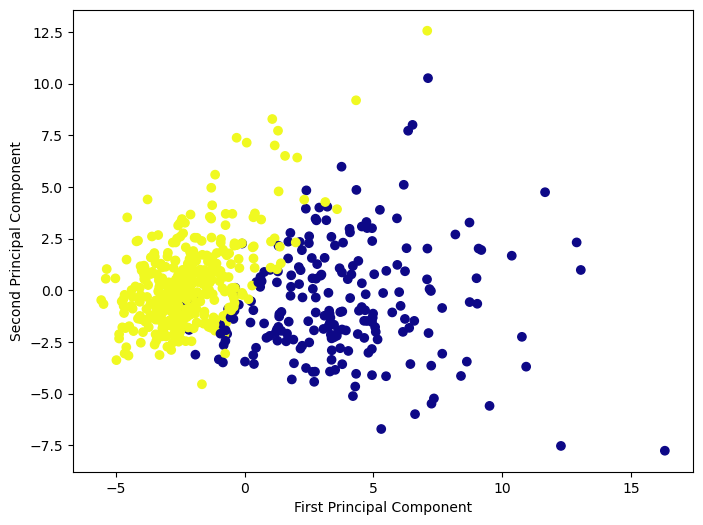

In [65]:
# plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],c=cancer['target'],cmap='plasma') # show distribution of clusters of 'target' variable

                                                                    # on the principal components 
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In our dataset, we have only two clusters/classes: class 0 and class 1. That's the reason, scatter plot is showing class 0 and class 1 on the principal components.